In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
df = pd.read_csv("city_data.csv")
df.index.name = "City ID"
df.head()

City  Cloudiness Country          Date  Humidity    Lat  \
City ID                                                                   
0             camopi          80      GF  1.553390e+09        71   3.17   
1        new norfolk          20      AU  1.553390e+09        64 -42.78   
2           antalaha           8      MG  1.553390e+09        92 -14.90   
3          jamestown          80      AU  1.553390e+09        70 -33.21   
4           meulaboh          88      ID  1.553390e+09       100   4.14   

            Lng  Max Temp  Wind Speed  
City ID                                
0        -52.33     79.90        4.16  
1        147.06     70.00       10.29  
2         50.28     77.65        9.64  
3        138.60     71.98       14.23  
4         96.13     76.75        4.05

In [3]:
#Sets the facecolor for all displayed figure.
#Figure.facecolor won't translate to the saved fig and must be added in the function
#axes.facecolor changes the actual body of the graph
plt.rcParams["figure.facecolor"] = "#D3D3D3"
plt.rcParams["axes.facecolor"] = "#ffffff"

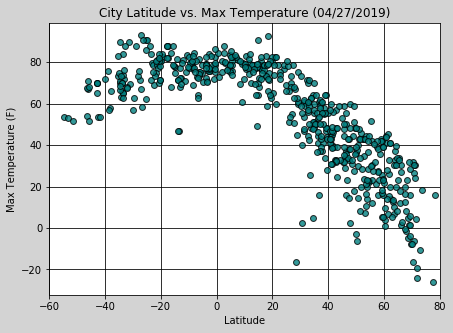

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(list(df.Lat),list(df["Max Temp"]),color="teal",marker="o", edgecolor="black",s=35,alpha=.8)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
ax.grid(color="black")
ax.set_axisbelow(True)
ax.set_xlim((-60,80))
date = time.strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Max Temperature ({date})")
#facecolor had to be added or it doesn't translate.
plt.savefig("Max_Temp.png",bbox_inches="tight", facecolor="#D3D3D3")

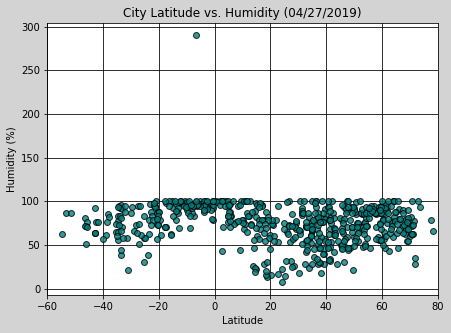

In [5]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(list(df.Lat),list(df["Humidity"]),color="teal",marker="o", edgecolor="black",s=35,alpha=.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
ax.grid(color="black")
ax.set_axisbelow(True)
ax.set_xlim((-60,80))
date = time.strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Humidity ({date})")
plt.savefig("Humidity.png",bbox_inches="tight", facecolor="#d3d3d3")

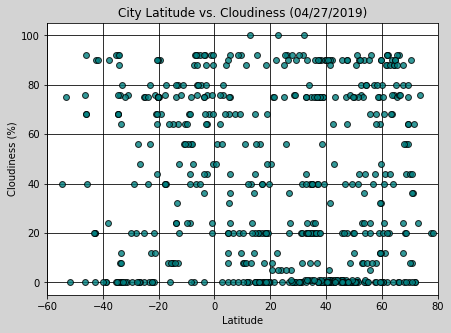

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(list(df.Lat),list(df["Cloudiness"]),color="teal",marker="o", edgecolor="black",s=35,alpha=.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
ax.grid(color="black")
ax.set_axisbelow(True)
ax.set_xlim((-60,80))
date = time.strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.savefig("Cloudiness.png",bbox_inches="tight", facecolor="#d3d3d3")

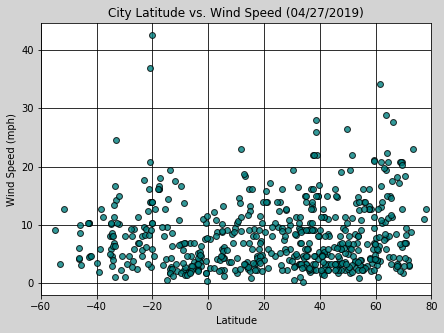

In [7]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(list(df.Lat),list(df["Wind Speed"]),color="teal",marker="o", edgecolor="black",s=35,alpha=.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
ax.grid(color="black")
ax.set_axisbelow(True)
ax.set_xlim((-60,80))
date = time.strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.savefig("Wind_Speed.png",bbox_inches="tight", facecolor="#d3d3d3")

In [45]:
import six
import numpy as np

In [50]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#008080', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [63]:
sub = [df["Date"][i].split(" ")[0] for i in range(len(df.index))]
df["Date"] = sub
df.head()

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
City ID                                                                         
0             camopi          80      GF  2019-03-24        71   3.17  -52.33   
1        new norfolk          20      AU  2019-03-24        64 -42.78  147.06   
2           antalaha           8      MG  2019-03-24        92 -14.90   50.28   
3          jamestown          80      AU  2019-03-24        70 -33.21  138.60   
4           meulaboh          88      ID  2019-03-24       100   4.14   96.13   

         Max Temp  Wind Speed  
City ID                        
0           79.90        4.16  
1           70.00       10.29  
2           77.65        9.64  
3           71.98       14.23  
4           76.75        4.05

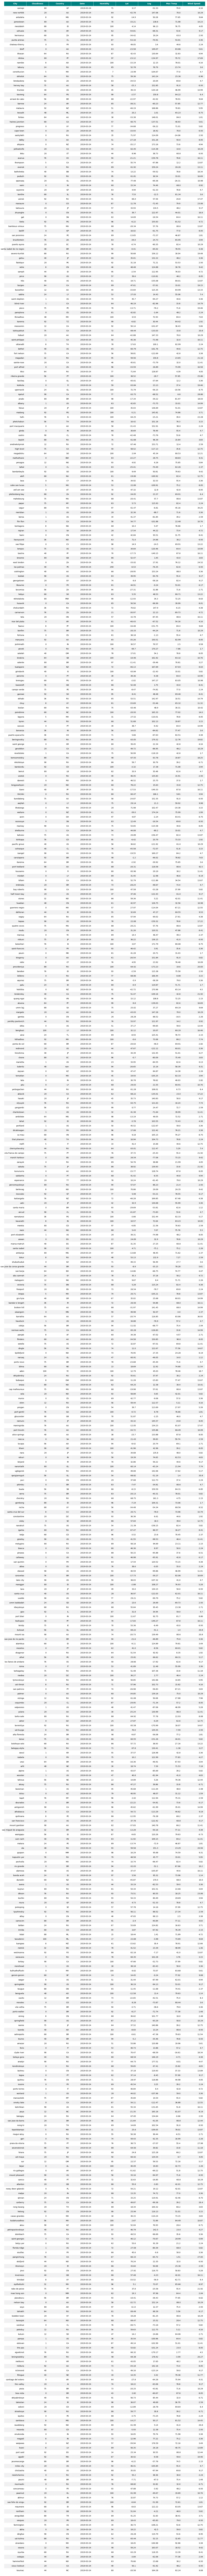

In [65]:
table = render_mpl_table(df)

In [67]:
table.figure.savefig("Data.png",bbox_inches="tight")